# Uso de modelos para traducción (Machine Translation)



In [1]:
from huggingface_hub import login

token = ""
print("Hugging Face logging")
login(token)

/Users/andreacimmino/Desktop/UEX/Sesion1_MT/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Hugging Face logging


ValueError: Token UEX not found in /Users/andreacimmino/.cache/huggingface/stored_tokens

## Modelos entrenados inglés-español

En [Hugging Face](https://huggingface.co/models) existen multiples modelos, entre los cuales, modelos orientados a machine translation. Principalmente, los más utilizados son:

* MarianMT: es un modelo especializado para traducción automática, para nuestro problema vamos a usar la versión preentrenada para inglés a español `Helsinki-NLP/opus-mt-en-es`.
* T5: es un modelo versátil preentrenado para varias tareas, incluyendo traducción. Para nuestro problema vamos a utilizar la versión más ligera `t5-small`.

### Modelo MarianMT


Para cargar un modelo MarianMt utilizaremos el método estático de la clase con el mismo nombre `MarianMTModel.from_pretrained` indicando el nombre del modelo, que en este caso es [Helsinki-NLP/opus-mt-en-es](https://huggingface.co/Helsinki-NLP/opus-mt-en-es) y los parámetro `cache_dir` y `local_files_only` que sirven para que la primera vez se descargue el modelo y las posteriores ejecuciones se hagan usando el modelo descargado en lugar de volver a descargarlo  en cada ejecución.

In [38]:
from transformers import MarianTokenizer, MarianMTModel

def load_pretrained_marian_mt():
    marian_model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-en-es", cache_dir="./models/pretrained_marian_en-es", local_files_only=False)
    marian_tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-es", cache_dir="./models/pretrained_marian_en-es", local_files_only=False)
    return marian_model, marian_tokenizer

marian_model, marian_tokenizer = load_pretrained_marian_mt()

text = "On the table, there were a good number of topics"
inputs = marian_tokenizer(text, return_tensors="pt")
translated_tokens = marian_model.generate(**inputs, do_sample=False, temperature=1.0)
translated_text = marian_tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
print(translated_text)

Sobre la mesa, había un buen número de temas


Notese que para utilizar el modelo, tenemos que pasar las entradas por el tokenizador y por el modelo. Para pasarla por el modelo utilizamos el método `.generate()` que posee varios parámetros interesantes:

* `do_sample` indica si el modelo debe muestrear probabilidades de las palabras posibles en cada paso, en lugar de elegir únicamente la palabra con la probabilidad más alta (modo greedy). Si valor es False (predeterminado)no se hace ningún muestreo y el modelo selecciona la palabra con la probabilidad más alta en cada paso (modo greedy o beam search). En cambio, si su valor es True se hacen muestreos según las probabilidades de las palabras posibles, lo que permite generar salidas más variadas. Es decir, utilizando `do_sample=False` se obtienen traducciones más deterministas y consistentes, en cambio, usando `do_sample=True` se obtienen resultados más creativos o variados, pero menos deterministas.
* `temperature` escala las probabilidades de las palabras generadas por el modelo, controlando la "aleatoriedad" del muestreo. Puede tomar los siguientes valores: un valor mayor a 1.0 aumenta la diversidad favoreciendo palabras menos probables; un valor menor a 1.0 reduce la diversidad, concentrándose en palabras más probables; un valor de 1.0 (predeterminado) utiliza las probabilidades originales del modelo. Por lo tanto, cuando `do_sample=False`, este parámetro no tiene efecto (porque no hay muestreo). Por el contrario, si `do_sample=True` regula la aleatoriedad en las generaciones.
* `num_beams` activa el beam search, una técnica que explora múltiples caminos en paralelo para encontrar la secuencia más probable. Puede tomar distintos valores: `num_beams=1` (predeterminado) indica un modo de operación greedy; `num_beams>1` indica el número de caminos a explorar. Este parámetro puede mejorar la calidad de las generaciones a costa de mayor tiempo de cómputo si se aumenta su valor.

#### Tarea MTB1

Cambiar los parámetros `do_sample` y `temperature` para que el modelo haga traducciones o generaciones lo menos deterministas posible, es decir, produzca alucinaciones.

In [39]:
text = "On the table, there were a good number of topics"
inputs = marian_tokenizer(text, return_tensors="pt")
translated_tokens = marian_model.generate(**inputs, do_sample=False, temperature=1.0)
translated_text = marian_tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
print(translated_text)

Sobre la mesa, había un buen número de temas


### Modelo T5

Para cargar un modelo T5 utilizaremos el método estático de la clase con el mismo nombre `T5ForConditionalgeneration.from_pretrained` indicando el nombre del modelo, que en este caso es [t5-small](https://huggingface.co/google-t5/t5-small) y los parámetro `cache_dir` y `local_files_only` que sirven para que la primera vez se descargue el modelo y las posteriores ejecuciones se hagan usando el modelo descargado en lugar de volver a descargarlo en cada ejecución. Además del modelo small, existen variantes más complejas y pesadas, como el [t5-base](https://huggingface.co/google-t5/t5-base) o el [t5-large](https://huggingface.co/google-t5/t5-large).

In [40]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

def load_pretrained_t5():
    # También existen t5-base o t5-large
    t5_model = T5ForConditionalGeneration.from_pretrained("vgaraujov/t5-base-translation-en-es", cache_dir="./models/pretrained_t5_en-es", local_files_only=False)
    t5_tokenizer = T5Tokenizer.from_pretrained("vgaraujov/t5-base-translation-en-es", cache_dir="./models/pretrained_t5_en-es", local_files_only=False)
    return t5_model, t5_tokenizer

t5_model, t5_tokenizer = load_pretrained_t5()

text = "On the table, there were a good number of topics"
inputs = t5_tokenizer(text, return_tensors="pt")
translated_tokens = t5_model.generate(**inputs, do_sample=False, temperature=1.0)
translated_text = t5_tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
print(translated_text)

/Users/andreacimmino/Desktop/UEX/Sesion1_MT/.venv/lib/python3.11/site-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


En la mesa, hubo un buen número de temas.


#### Tarea MTB2

Cambiar los parámetros `do_sample` y `temperature` para que el modelo haga traducciones o generaciones lo menos deterministas posible, es decir, produzca alucinaciones.


In [41]:
text = "On the table, there were a good number of topics"
inputs = t5_tokenizer(text, return_tensors="pt")
translated_tokens = t5_model.generate(**inputs, do_sample=False, temperature=1.0)
translated_text = t5_tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
print(translated_text)

En la mesa, hubo un buen número de temas.


#### Tarea conjunta de la clase MTB3: ¿Qué modelo es mejor?

Justificar que modelo de los anteriores traduce mejor, ¿Qué prueba numérica sustenta la respuesta? ¿Es una justificación reproducible y objetiva?

#### Tarea MTB4

Escribir una función de python que recibe una frase de entrada, un modelo y un tokenizador y devuelve la traducción de salida. Usando esta función se tiene que poder pasar por parámetro los modelos T5 y MarianMT y obtener las traducciones.

In [42]:
# TODO: Implementar esta funcion
def translate(text, model, tokenizer, do_sample=False, temperature=1.0):
    pass

text = "On the table, there were a good number of topics"
translated_text = translate(text, marian_model, marian_tokenizer)
print("Marian translation: ",translated_text)
translated_text = translate(text, t5_model, t5_tokenizer)
print("T5 translation: ",translated_text)

Sobre la mesa, había un buen número de temas
En la mesa, hubo un buen número de temas.


Para traducir un array de frases o textos, se puede usar la siguiente función que optimizar los recursos del ordenador.

In [43]:
import torch
def translate_batch(texts, model, tokenizer, batch_size=32, do_sample=False, temperature=1.0):
    translations = []
    model.eval()  # Asegurarse de estar en modo inferencia
    device = "cuda" if torch.cuda.is_available() else "cpu"  # Usar GPU si está disponible
    model.to(device)

    with torch.no_grad():  # Deshabilitar gradientes para inferencia
        for i in range(0, len(texts), batch_size):
            batch_texts = texts[i:i+batch_size]
            inputs = tokenizer(batch_texts, return_tensors="pt", truncation=True, max_length=90, padding=True).to(device)
            translated_tokens = model.generate(**inputs, do_sample=do_sample, temperature=temperature)
            translations.extend(tokenizer.batch_decode(translated_tokens, skip_special_tokens=True))

    return translations

### Comparación de modelos

Para comparar modelos, es necesario calcular métricas objetivas y reproducibles. Estas métricas normalmente dependen de un `gold-standard`, la verdad absoluta, lo que nos permite para una entrada ver si el modelo es capaz de generar una salida tal y como el `gold-standard` indica. Sin embargo, para problemas más difusos como la traducción las métricas normalmente no son simples. En particular, para la traducción se suelen utilizar tres métricas: BLEU (Bilingual Evaluation Understudy), METEOR (Metric for Evaluation of Translation with Explicit ORdering), y ROUGE (Recall-Oriented Understudy for Gisting Evaluation).

* **BLEU** mide la similitud entre una traducción generada y la esperada. Para ello, calcula la similitud usando ngrams (unigramas, bigramas, etc.) entre la salida obtenida y la esperada (presente en el `gold-standard`); además, penaliza las salidas muy cortas. El resultado de esta métrica es un valor porcentual donde a mayor valor se considera que más **precisa** es la traducción. Una limitación conocida es que tiende a favorecer las traducciones literales por el uso de ngrams.

* **METEOR** es una métrica similar a **BLEU** pero que se centra en evaluar la similitud con sinonimias, stemming y coincidencias exactas. Esto hace que sea menos sensible a las traducciones literales y más flexible con traducciones menos literales. Internamente, esta métrica calcula precisión, recall y un F1 ajustado. Su resultado es un valor de 0 a 1, donde a mayor valor mejor es la traducción. Una limitación conocida es que es computacionalmente más costoso de **BLEU**, lo que lo hace menos usado que **BLEU** o **ROUGE**.

* **ROUGE** evalúa la calidad de la traducción comparando la salida generada con la del `gold-standard` usado en resúmenes automáticos (n-grams y la longitud de las subsecuencias comunes). Tiene tres variantes principales: `ROUGE-1` compara unigramas, `ROUGE-2` compara bigramas, `ROUGE-L` compara la subsecuencia común más larga. Su resultado es un valor entre 0 y 1, donde a mayor valor mejor es la traducción; normalmente esta métrica se asocia al **recall**. Como limitaciones conocidas, esta metrica es insensible a la sinonimia o variaciones semánticas, además, penaliza traducciones "creativas".

Para calcular estas métricas vamos a hacer uso del paquete `evaluate`

#### Tarea MTB5

Cargue en una variable el dataset de `okezieowen/english_to_spanish` y almacénelo en la carpeta `./data/okezieowen`. Despúes, prepare un conjunto de testing que contenga 50 frases del dataset. No "baraje" las frases del dataset ni utilice ningún `seed`.

In [44]:
from datasets import load_dataset

# TODO: Implementar el código que carga el dataset `okezieowen/english_to_spanish`
# TODO: dividir el dataset para que tenga un tamaño de 50 muestras
eval_dataset = ...
print("Evaluation size: ", len(eval_dataset))
print(eval_dataset)

Evaluation size:  50
Dataset({
    features: ['English', 'Spanish'],
    num_rows: 50
})


Antes de poder aplicar las métricas, necesitamos construir el código que usando el dataset, genere una variable con los resultados esperados y, por otro lado, genere las salidas de cada modelo.

In [45]:
expected_results = [ [row['Spanish']] for row in eval_dataset]
inputs = [row['English'] for row in eval_dataset]

t5_results = translate_batch(inputs, t5_model, t5_tokenizer)
marianmt_results = translate_batch(inputs, marian_model, marian_tokenizer)

**NOTA:** Un ejercicio interesante sería ejecutar el código anterior con la función `translate` para ver la diferencia de tiempo

#### Evaluación de modelos

In [46]:
import evaluate

bleu_metric = evaluate.load("bleu")
meteor_metric = evaluate.load("meteor")
rouge_metric = evaluate.load("rouge")

bleu_t5 = bleu_metric.compute(predictions=t5_results, references=expected_results)
meteor_t5 = meteor_metric.compute(predictions=t5_results, references=expected_results)
rouge_t5 = rouge_metric.compute(predictions=t5_results, references=expected_results)

bleu_marian = bleu_metric.compute(predictions=marianmt_results, references=expected_results)
meteor_marian = meteor_metric.compute(predictions=marianmt_results, references=expected_results)
rouge_marian = rouge_metric.compute(predictions=marianmt_results, references=expected_results)

print("Metric -- T5 -- MarianMT \n")
print("BLEU --- ",bleu_t5['bleu'], " --- ", bleu_marian['bleu'])
print("METEOR --- ",meteor_t5['meteor'], " --- ", meteor_marian['meteor'])
print("ROUGE1 --- ",rouge_t5['rouge1'], " --- ", rouge_marian['rouge1'])
print("ROUGE2 --- ",rouge_t5['rouge2'], " --- ", rouge_marian['rouge2'])
print("ROUGEL --- ",rouge_t5['rougeL'], " --- ", rouge_marian['rougeL'])


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/andreacimmino/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/andreacimmino/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/andreacimmino/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Metric -- T5 -- MarianMT 

BLEU ---  0.047010356676059045  ---  0.13564548577867838
METEOR ---  0.18548786632237693  ---  0.2783701721070027
ROUGE1 ---  0.25091628549092837  ---  0.3172774903942095
ROUGE2 ---  0.10163730092512918  ---  0.15935665365749724
ROUGEL ---  0.2126442539200371  ---  0.27094292257040353


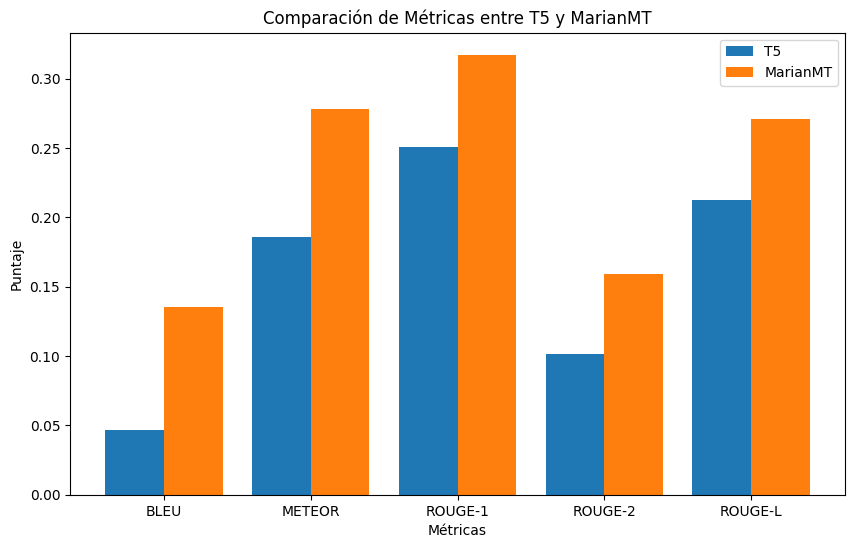

In [47]:
import matplotlib.pyplot as plt

# Sustituye estos valores por los resultados reales
scores_t5 = {
    "BLEU": bleu_t5['bleu'],
    "METEOR": meteor_t5["meteor"],
    "ROUGE-1": rouge_t5["rouge1"],
    "ROUGE-2": rouge_t5["rouge2"],
    "ROUGE-L": rouge_t5["rougeL"]
}

scores_marian = {
    "BLEU": bleu_marian["bleu"],
    "METEOR": meteor_marian["meteor"],
    "ROUGE-1": rouge_marian["rouge1"],
    "ROUGE-2": rouge_marian["rouge2"],
    "ROUGE-L": rouge_marian["rougeL"],
}

# Crear gráfico
labels = list(scores_t5.keys())
t5_values = list(scores_t5.values())
marian_values = list(scores_marian.values())

x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, t5_values, width=0.4, label="T5", align="center")
plt.bar([i + 0.4 for i in x], marian_values, width=0.4, label="MarianMT", align="center")

# Configurar etiquetas y leyenda
plt.xticks([i + 0.2 for i in x], labels)
plt.xlabel("Métricas")
plt.ylabel("Puntaje")
plt.title("Comparación de Métricas entre T5 y MarianMT")
plt.legend()

Como se puede observar los resultados no son muy buenos, esto se debe a la naturaleza juridica del dataset que estamos usando. Veamos un ejemplo en particular:

In [48]:
expected_output = "Su Señoría, si así lo desea, podrá plantear esta cuestión en ese momento, es decir, el jueves antes de que se presente el informe."
text = "That is precisely the time when you may, if you wish, raise this question, i.e. on Thursday prior to the start of the presentation of the report."
translated_text = translate(text, marian_model, marian_tokenizer)
print("Marian translation: ", translated_text)
translated_text = translate(text, t5_model, t5_tokenizer)
print("T5 translation: ", translated_text)
print("Expected: ", expected_output)

Marian translation:  Ese es precisamente el momento en que, si lo desea, puede plantear esta cuestión, es decir, el jueves antes del comienzo de la presentación del informe.


/Users/andreacimmino/Desktop/UEX/Sesion1_MT/.venv/lib/python3.11/site-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


T5 translation:  Es precisamente cuando usted puede, si lo desea, formular esta pregunta, es decir, el jueves
Expected:  Su Señoría, si así lo desea, podrá plantear esta cuestión en ese momento, es decir, el jueves antes de que se presente el informe.


## Modelos refinados inglés-español

Cuando se usan modelos, otra opción, es utilizar un modelo preentrenado y refinarlos con un nuevo conjunto de entrenamiento. Para ello podemos usar los modelos anteriores y volverlos a entrenar con las clases `TrainerArguments`y `Trainer`.

`TrainingArguments` es una clase que codifica los parámetros que se aplicarán durante el entrenamiento del modelo, o su refinamiento si el modelo ya está entrenado. Recibe ciertos argumentos que es importante conocer:

* `output_dir` indica en que directorio se guardará los resultados del entrenamiento, los checkpoints, y los logs.
* `eval_strategy` indica cuándo se realizará la evaluación durante el entrenamiento, su resultado nos da una idea de como el modelo está aprendiendo. Puede tomar como valor `no`, si no se desea realiza evaluación alguna, `epoch` si se desea realizar una evaluación después de cada época o `steps` si se desea realizar la evaluación después de un número específico de pasos (requiere `eval_steps`).
* `eval_steps` recibe un número entero que indica el número de pasos entre evaluaciones
* `num_train_epochs` indica el número de épocas de entrenamiento
* `save_strategy` indica cada cuantas epocas se guarda el modelo. Puede tomar como valor `no` (no se guardan checkpoints), `epoch` (guarda después de cada época) y `steps` (guarda después de un número específico de pasos).
* `learning_rate` indica la tasa de aprendizaje para el optimizador. Un valor típico es `5e-5`.
* `per_device_train_batch_size` tamaño del lote (batch) durante el entrenamiento. Si se usan múltiples GPUs, este valor se multiplica por el número de dispositivos.


In [49]:
from transformers import Trainer, TrainingArguments, DataCollatorForSeq2Seq

training_args = TrainingArguments(
    output_dir="./models/training/refined-t5-en-es",
    eval_strategy="epoch",
    learning_rate=2e-4,
    per_device_train_batch_size=10,
    gradient_accumulation_steps=4,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_strategy="steps",
    logging_steps=100,
    logging_dir='./logs',
    report_to="none"
)


`Trainer` es la clase encargada de, usando los argumentos de entrenamiento, refinar un modelo. Sin embargo necesita recibir un conjunto de parámetros complejo:

* `model` el modelo a entrenar
* `args` los argumentos de entrenamiento resultado de crear un objeto `TrainingArguments`
* `train_dataset` el dataset de entrenamiento ya tokenizado
* `test_dataset` el dataset de evaluación/validación ya tokenizado
* `data_collator` una instancia de la clase `DataCollatorForSeq2Seq`

A continuación podemos ver un fragmento de código para el modelo t5 y MarianMT

### Refinando un modelo T5

In [ ]:
import os
dataset = load_dataset("Iker/Document-Translation-en-es", split="train", cache_dir="./data/iker")
split_dataset = dataset.train_test_split(train_size=50, test_size=50)
train_dataset = split_dataset["train"]
eval_dataset = split_dataset["test"]

t5_model, t5_tokenizer = load_pretrained_t5()

def preprocess_function(examples):
    global t5_tokenizer
    inputs_lang = examples['en']
    targets_lang =  examples['es']

    model_inputs = t5_tokenizer(inputs_lang, text_target=targets_lang, max_length=128, truncation=True, padding="max_length")
    return model_inputs

encoded_training_dataset = train_dataset.map(preprocess_function, batched=True)
encoded_eval_dataset = eval_dataset.map(preprocess_function, batched=True)

collator = DataCollatorForSeq2Seq(tokenizer=t5_tokenizer, model=t5_model)
trainer = Trainer(
    model=t5_model,
    args=training_args,
    train_dataset=encoded_training_dataset,
    eval_dataset=encoded_eval_dataset,
    data_collator= collator
)

if not os.path.exists("./models/refined-t5-en-es"):
    trainer.train()

# Guardar el modelo y el tokenizador después del entrenamiento
t5_model.save_pretrained("./models/refined-t5-en-es")
t5_tokenizer.save_pretrained("./models/refined-t5-en-es")

Epoch,Training Loss,Validation Loss
0,No log,2.377036


In [ ]:
def load_refined_t5():
    t5_model = T5ForConditionalGeneration.from_pretrained("./models/refined-t5-en-es")
    t5_tokenizer = T5Tokenizer.from_pretrained("./models/refined-t5-en-es")
    return t5_model, t5_tokenizer

t5_refined_model, t5_refined_tokenizer = load_refined_t5()
text = "On the table, there were a good number of topics"
translated_text = translate(text, t5_refined_model, t5_refined_tokenizer)
print(">T5 refined: ", translated_text)

### Refinando un modelo MarianMT

#### Tarea MB6

Reutilizando el código del modelo T5, refinar el modelo MarianMT utilizando los mismos datos que para el T5. Es importante que el modelo se guarde en "./models/refined-marian-en-es"

In [ ]:
from transformers import Trainer, TrainingArguments, DataCollatorForSeq2Seq

training_args = TrainingArguments(
    output_dir="./models/training/refined-marian-en-es",
    eval_strategy="epoch",
    learning_rate=2e-4,
    per_device_train_batch_size=10,
    gradient_accumulation_steps=4,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_strategy="steps",
    logging_steps=100,
    logging_dir='./logs',
    report_to="none"
)

# TODO: preparar los conjuntos de train y eval igual que antes a partir del dataset "Iker/Document-Translation-en-es"


# TODO: Cargar el modelo y tokenizador pre-entrenado marian mt

# TODO: modificar la funcion `preprocess_function` para que use el tokenizador de marian


# TODO: codificar el dataset de training y eval


# TODO: Construir el collator y el trainer


# TODO: Entrenar o refinar el modelo


# TODO: Guardar el modelo y el tokenizador después del entrenamiento en "./models/refined-marian-en-es")



def load_refined_marian():
    marian_model = MarianMTModel.from_pretrained("./models/refined-marian-en-es")
    marian_tokenizer = MarianTokenizer.from_pretrained("./models/refined-marian-en-es")
    return marian_model, marian_tokenizer

# DONE: Cargar el modelo y probar a traducir la frase "On the table, there were a good number of topics"
marian_refined_model, marian_refined_tokenizer = load_refined_marian()
text = ["On the table, there were a good number of topics"]
translated_text = translate(text, marian_refined_model, marian_refined_tokenizer)
print(">Marian refined: ", translated_text)

### Comparación de modelos preentrenados vs refinados

In [ ]:
import matplotlib.pyplot as plt

t5_refined_results = translate_batch(inputs, t5_refined_model, t5_refined_tokenizer)
marianmt_refined_results = translate_batch(inputs, marian_refined_model, marian_refined_tokenizer)

bleu_metric = evaluate.load("bleu")
meteor_metric = evaluate.load("meteor")
rouge_metric = evaluate.load("rouge")

bleu_t5_refined = bleu_metric.compute(predictions=t5_refined_results, references=expected_results)
meteor_t5_refined = meteor_metric.compute(predictions=t5_refined_results, references=expected_results)
rouge_t5_refined = rouge_metric.compute(predictions=t5_refined_results, references=expected_results)

bleu_marian_refined = bleu_metric.compute(predictions=marianmt_refined_results, references=expected_results)
meteor_marian_refined = meteor_metric.compute(predictions=marianmt_refined_results, references=expected_results)
rouge_marian_refined = rouge_metric.compute(predictions=marianmt_refined_results, references=expected_results)

# Sustituye estos valores por los resultados reales
scores_t5 = {
    "BLEU": bleu_t5['bleu'],
    "METEOR": meteor_t5["meteor"],
    "ROUGE-1": rouge_t5["rouge1"],
    "ROUGE-2": rouge_t5["rouge2"],
    "ROUGE-L": rouge_t5["rougeL"]
}

scores_marian = {
    "BLEU": bleu_marian["bleu"],
    "METEOR": meteor_marian["meteor"],
    "ROUGE-1": rouge_marian["rouge1"],
    "ROUGE-2": rouge_marian["rouge2"],
    "ROUGE-L": rouge_marian["rougeL"],
}

scores_t5_refined = {
    "BLEU": bleu_t5_refined['bleu'],
    "METEOR": meteor_t5_refined["meteor"],
    "ROUGE-1": rouge_t5_refined["rouge1"],
    "ROUGE-2": rouge_t5_refined["rouge2"],
    "ROUGE-L": rouge_t5_refined["rougeL"]
}


scores_marian_refined = {
    "BLEU": bleu_marian_refined["bleu"],
    "METEOR": meteor_marian_refined["meteor"],
    "ROUGE-1": rouge_marian_refined["rouge1"],
    "ROUGE-2": rouge_marian_refined["rouge2"],
    "ROUGE-L": rouge_marian_refined["rougeL"],
}


# Crear gráfico
labels = list(scores_t5.keys())
t5_values = list(scores_t5.values())
marian_values = list(scores_marian.values())
t5_values_refined = list(scores_t5_refined.values())
marian_values_refined = list(scores_marian_refined.values())

x = range(len(labels))
bar_width = 0.2  # Reducimos el ancho de las barras para que estén más juntas

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width * 1.5 for i in x], t5_values, width=bar_width, label="T5", align="center")
plt.bar([i - bar_width * 0.5 for i in x], marian_values, width=bar_width, label="MarianMT", align="center")
plt.bar([i + bar_width * 0.5 for i in x], t5_values_refined, width=bar_width, label="T5Refined", align="center")
plt.bar([i + bar_width * 1.5 for i in x], marian_values_refined, width=bar_width, label="MarianMTRefined", align="center")

# Configurar etiquetas y leyenda
plt.xticks(x, labels)
plt.xlabel("Métricas")
plt.ylabel("Puntaje")
plt.title("Comparación de Métricas entre T5 y MarianMT (pretrained vs refined)")
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Tarea MB7 comentar los resultados obtenidos
¿Cómo es eso posible? ¿En que puede influenciar el dataset utilizado?

## Modelos sin entrenamiento previo (tabula rasa)



Para utilizar modelos sin entrenamiento previo, o bien disponemos de uno existente que no haya sido entrenado, o en nuestro caso tenemos que resetear los pesos internos de los modelos generando una configuración nueva incial del encoder y decoder.

### Entrenando un modelo MarianMt desde 0

#### Generando un nuevo modelo "tabula rasa"

In [ ]:
from transformers import MarianMTModel, MarianTokenizer, MarianConfig

# Crear configuración para un modelo Marian en blanco
config = MarianConfig(
    vocab_size=32000,  # Tamaño del vocabulario (ajústalo según tu caso)
    max_position_embeddings=512,
    encoder_layers=6,
    decoder_layers=6,
    encoder_attention_heads=8,
    decoder_attention_heads=8,
    d_model=512,
    d_ff=2048,
    dropout=0.1,
    pad_token_id=0,
    eos_token_id=1,
    bos_token_id=2,
)

# Crear el modelo MarianMT desde cero
marian_model_trained = MarianMTModel(config)

# Crear un tokenizador vacío (puedes cargar o definir tu propio vocabulario)
marian_tokenizer_trained = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-es")
marian_model_trained.resize_token_embeddings(len(marian_tokenizer_trained))


marian_model_trained.save_pretrained("./models/trained-marian-en-es")
# Ajustar el tamaño del vocabulario del modelo Marian para que coincida con el tokenizador
marian_tokenizer_trained.save_pretrained("./models/trained-marian-en-es")

try:
    text = ["On the table, there were a good number of topics"]
    translated_text = translate(text,marian_model_trained, marian_tokenizer_trained)
    print("MarianMt trained: ",translated_text)
except Exception as e:
    print(e)


In [ ]:
def load_trained_marian():
    marian_model = MarianMTModel.from_pretrained("./models/trained-marian-en-es")
    marian_tokenizer = MarianTokenizer.from_pretrained("./models/trained-marian-en-es")
    return marian_model, marian_tokenizer


#### Entrenando el modelo

In [ ]:
from transformers import Trainer, TrainingArguments, DataCollatorForSeq2Seq

training_args = TrainingArguments(
    output_dir="./models/training/trained-marian-en-es",
    eval_strategy="epoch",
    learning_rate=2e-4,
    per_device_train_batch_size=10,
    gradient_accumulation_steps=4,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_strategy="steps",
    logging_steps=100,
    logging_dir='./logs',
    report_to="none"
)

dataset = load_dataset("Iker/Document-Translation-en-es", split="train", cache_dir="./data/iker")
split_dataset = dataset.train_test_split(train_size=1000, test_size=50)
train_dataset = split_dataset["train"]
eval_dataset = split_dataset["test"]

marian_model_trained, marian_tokenizer_trained = load_trained_marian()

def preprocess_function(examples):
    global marian_tokenizer_trained
    inputs_lang = examples['en']
    targets_lang =  examples['es']

    model_inputs = marian_tokenizer_trained(inputs_lang, text_target=targets_lang, max_length=128, truncation=True, padding="max_length")
    return model_inputs

encoded_training_dataset = train_dataset.map(preprocess_function, batched=True)
encoded_eval_dataset = eval_dataset.map(preprocess_function, batched=True)

collator = DataCollatorForSeq2Seq(tokenizer=marian_tokenizer_trained, model=marian_model_trained)
trainer = Trainer(
    model=marian_model_trained,
    args=training_args,
    train_dataset=encoded_training_dataset,
    eval_dataset=encoded_eval_dataset,
    data_collator= collator
)

trainer.train()

marian_model_trained.save_pretrained("./models/trained-marian-en-es")
marian_tokenizer_trained.save_pretrained("./models/trained-marian-en-es")

marian_trained_model, marian_trained_tokenizer = load_trained_marian()
text = "On the table, there were a good number of topics"
translated_text = translate(text, marian_trained_model, marian_trained_tokenizer)
print(">Marian trained: ", translated_text)

### Entrenando un modelo T5 desde 0

#### Generando un nuevo modelo "tabula rasa"

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer, T5Config

# Crear configuración para un modelo T5 en blanco
config = T5Config(
    vocab_size=32000,
    d_model=512,
    d_ff=2048,
    num_layers=6,
    num_heads=8,
    dropout_rate=0.1,
    pad_token_id=0,  # Token de padding
    eos_token_id=1,  # Token de fin de secuencia
    decoder_start_token_id=0,  # Token de inicio del decodificador
)

t5_model_trained = T5ForConditionalGeneration(config)

t5_tokenizer_trained = T5Tokenizer.from_pretrained("vgaraujov/t5-base-translation-en-es")

t5_model_trained.save_pretrained("./models/trained-t5-en-es")
t5_tokenizer_trained.save_pretrained("./models/trained-t5-en-es")


try:
    text = "On the table, there were a good number of topics"
    translated_text = translate(text,t5_model_trained, t5_tokenizer_trained)
    print("T5 trained: ",translated_text)
except Exception as e:
    print(e)

def load_trained_t5():
    t5_model = T5ForConditionalGeneration.from_pretrained("./models/trained-t5-en-es")
    t5_tokenizer = T5Tokenizer.from_pretrained("./models/trained-t5-en-es")
    return t5_model, t5_tokenizer


#### Entrenando el modelo

#### Tarea MB8

Completar el siguiente código para entrenar el modelo T5

In [ ]:
from transformers import Trainer, TrainingArguments, DataCollatorForSeq2Seq

training_args = TrainingArguments(
    output_dir="./models/training/trained-t5-en-es",
    eval_strategy="epoch",
    learning_rate=2e-4,
    per_device_train_batch_size=10,
    gradient_accumulation_steps=4,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_strategy="steps",
    logging_steps=100,
    logging_dir='./logs',
    report_to="none"
)


dataset = load_dataset("Iker/Document-Translation-en-es", split="train", cache_dir="./data/iker")
split_dataset = dataset.train_test_split(train_size=1000, test_size=50)
train_dataset = split_dataset["train"]
eval_dataset = split_dataset["test"]

t5_model_trained, t5_tokenizer_trained = load_trained_t5()

def preprocess_function(examples):
    global t5_tokenizer_trained
    inputs_lang = examples['en']
    targets_lang =  examples['es']

    model_inputs = t5_tokenizer_trained(inputs_lang, text_target=targets_lang, max_length=128, truncation=True, padding="max_length")
    return model_inputs

encoded_training_dataset = train_dataset.map(preprocess_function, batched=True)
encoded_eval_dataset = eval_dataset.map(preprocess_function, batched=True)

collator = DataCollatorForSeq2Seq(tokenizer=t5_tokenizer_trained, model=t5_model_trained)
trainer = Trainer(
    model=t5_model_trained,
    args=training_args,
    train_dataset=encoded_training_dataset,
    eval_dataset=encoded_eval_dataset,
    data_collator= collator
)

trainer.train()

t5_model_trained.save_pretrained("./models/trained-t5-en-es")
t5_tokenizer_trained.save_pretrained("./models/trained-t5-en-es")

t5_trained_model, t5_trained_tokenizer = load_trained_t5()
text = ["On the table, there were a good number of topics"]
translated_text = translate(text, t5_trained_model, t5_trained_tokenizer)
print(">Marian trained: ", translated_text)

### Comparando todos los modelos

In [ ]:
import matplotlib.pyplot as plt

t5_trained_results = translate_batch(inputs, t5_trained_model, t5_trained_tokenizer)
marianmt_trained_results = translate_batch(inputs, marian_trained_model, marian_trained_tokenizer)

bleu_metric = evaluate.load("bleu")
meteor_metric = evaluate.load("meteor")
rouge_metric = evaluate.load("rouge")

bleu_t5_trained = bleu_metric.compute(predictions=t5_trained_results, references=expected_results)
meteor_t5_trained = meteor_metric.compute(predictions=t5_trained_results, references=expected_results)
rouge_t5_trained = rouge_metric.compute(predictions=t5_trained_results, references=expected_results)

bleu_marian_trained = bleu_metric.compute(predictions=marianmt_trained_results, references=expected_results)
meteor_marian_trained = meteor_metric.compute(predictions=marianmt_trained_results, references=expected_results)
rouge_marian_trained = rouge_metric.compute(predictions=marianmt_trained_results, references=expected_results)

# Sustituye estos valores por los resultados reales
scores_t5 = {
    "BLEU": bleu_t5['bleu'],
    "METEOR": meteor_t5["meteor"],
    "ROUGE-1": rouge_t5["rouge1"],
    "ROUGE-2": rouge_t5["rouge2"],
    "ROUGE-L": rouge_t5["rougeL"]
}

scores_marian = {
    "BLEU": bleu_marian["bleu"],
    "METEOR": meteor_marian["meteor"],
    "ROUGE-1": rouge_marian["rouge1"],
    "ROUGE-2": rouge_marian["rouge2"],
    "ROUGE-L": rouge_marian["rougeL"],
}

scores_t5_refined = {
    "BLEU": bleu_t5_refined['bleu'],
    "METEOR": meteor_t5_refined["meteor"],
    "ROUGE-1": rouge_t5_refined["rouge1"],
    "ROUGE-2": rouge_t5_refined["rouge2"],
    "ROUGE-L": rouge_t5_refined["rougeL"]
}


scores_marian_refined = {
    "BLEU": bleu_marian_refined["bleu"],
    "METEOR": meteor_marian_refined["meteor"],
    "ROUGE-1": rouge_marian_refined["rouge1"],
    "ROUGE-2": rouge_marian_refined["rouge2"],
    "ROUGE-L": rouge_marian_refined["rougeL"],
}

scores_t5_trained = {
    "BLEU": bleu_t5_trained['bleu'],
    "METEOR": meteor_t5_trained["meteor"],
    "ROUGE-1": rouge_t5_trained["rouge1"],
    "ROUGE-2": rouge_t5_trained["rouge2"],
    "ROUGE-L": rouge_t5_trained["rougeL"]
}


scores_marian_trained = {
    "BLEU": bleu_marian_trained["bleu"],
    "METEOR": meteor_marian_trained["meteor"],
    "ROUGE-1": rouge_marian_trained["rouge1"],
    "ROUGE-2": rouge_marian_trained["rouge2"],
    "ROUGE-L": rouge_marian_trained["rougeL"],
}


# Crear gráfico
labels = list(scores_t5.keys())
t5_values = list(scores_t5.values())
marian_values = list(scores_marian.values())
t5_values_refined = list(scores_t5_refined.values())
marian_values_refined = list(scores_marian_refined.values())
t5_values_trained = list(scores_t5_trained.values())
marian_values_trained= list(scores_marian_trained.values())

x = range(len(labels))
bar_width = 0.15  # Ajustar el ancho de las barras

# Crear gráfico
plt.figure(figsize=(12, 6))

plt.bar([i - 2 * bar_width for i in x], t5_values, width=bar_width, label="T5")
plt.bar([i - bar_width for i in x], marian_values, width=bar_width, label="MarianMT")
plt.bar(x, t5_values_refined, width=bar_width, label="T5Refined")
plt.bar([i + bar_width for i in x], marian_values_refined, width=bar_width, label="MarianMTRefined")
plt.bar([i + 2 * bar_width for i in x], t5_values_trained, width=bar_width, label="T5Trained")
plt.bar([i + 3 * bar_width for i in x], marian_values_trained, width=bar_width, label="MarianMTTrained")

# Configurar etiquetas y leyenda
plt.xticks(x, labels)
plt.xlabel("Métricas")
plt.ylabel("Puntaje")
plt.title("Comparación de Métricas entre T5 y MarianMT (pretrained vs refined vs trained)")
plt.legend()
plt.tight_layout()

plt.show()

#### Tarea MB9
Comentar los resultados obtenidos, ¿Por qué los modelos entrenados no tienen un buen *performance*? ¿Puede un modelo mal entrenado obtener resultados evaluables?